Script for creating visualisation

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import mapclassify
import numpy as np

In [2]:
# load geometry data
vic_geo_df = gpd.read_file('../data/VIC_LOCALITY_POLYGON_shp.geojson')

In [3]:
vic_geo_df.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,VIC_LGA_sh,VIC_LGA__1,VIC_LGA__2,VIC_LGA__3,VIC_LGA__4,VIC_LGA__5,geometry
0,452,2017-09-08,None,VIC245,2017-09-08,None,FALLS CREEK ALPINE RESORT (UNINCORPORATED),FALLS CREEK ALPINE RESORT (UNINC),None,2,"POLYGON ((147.24172 -36.86703, 147.24202 -36.8..."
1,465,2017-09-08,None,VIC246,2017-09-08,None,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12999, 146.46062 -37.1..."
2,475,2017-09-08,None,VIC231,2017-09-08,None,CORANGAMITE SHIRE,CORANGAMITE,None,2,"POLYGON ((143.47180 -38.28086, 143.47117 -38.2..."
3,480,2017-09-08,None,VIC226,2017-09-08,None,KINGSTON CITY,KINGSTON,None,2,"POLYGON ((145.10925 -38.04438, 145.10912 -38.0..."
4,481,2017-09-08,None,VIC227,2017-09-08,None,FRANKSTON CITY,FRANKSTON,None,2,"POLYGON ((145.10531 -38.15533, 145.10556 -38.1..."


In [4]:
# load active cases data
df_all_dates = pd.read_csv('../data/all_dates.csv')

In [5]:
df_all_dates.head()

,lga,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,...,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05
0,ALPINE,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,0,0
1,ARARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1.0,1,1,1,1
2,BALLARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,10,10,10,10,11.0,11,11,12,13
3,BANYULE,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,151,144,144,144,141,146.0,143,136,133,148
4,BASS COAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,2,3,4,5.0,4,4,3,4


In [102]:
vic_geo_df = pd.merge(vic_geo_df[['VIC_LGA__3', 'geometry']], df_all_dates[['lga', '2020-08-05']], how = 'inner', left_on = 'VIC_LGA__3', right_on = 'lga', sort = True)

In [103]:
vic_geo_df.head()

,VIC_LGA__3,geometry,lga,2020-08-05
0,ALPINE,"POLYGON ((147.33765 -37.02971, 147.33788 -37.0...",ALPINE,0
1,ARARAT,"POLYGON ((142.41911 -37.47345, 142.41891 -37.4...",ARARAT,1
2,BALLARAT,"POLYGON ((143.84322 -37.67028, 143.84303 -37.6...",BALLARAT,13
3,BANYULE,"POLYGON ((145.13566 -37.74089, 145.13561 -37.7...",BANYULE,148
4,BASS COAST,"POLYGON ((145.50141 -38.57222, 145.49637 -38.5...",BASS COAST,4


<AxesSubplot:>

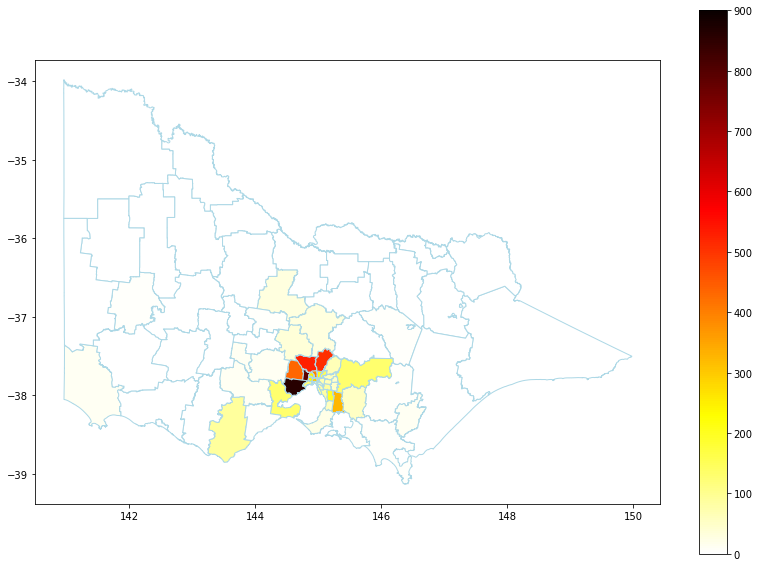

In [104]:
vic_geo_df.plot(figsize = (14,10), column = '2020-08-05', legend = True, 
                      cmap = 'hot_r', k = 20, vmin = 0, vmax = 900, edgecolor = 'lightblue')

now just map the melbourne lgas

In [105]:
melb_lgas = ['Banyule','Bayside','Boroondara','Brimbank','Cardinia','Casey','Darebin','Frankston','Glen Eira',
'Greater Dandenong','Hobsons Bay','Hume','Kingston','Knox','Manningham','Maribyrnong','Maroondah','Melbourne',
'Melton','Monash','Moonee Valley','Moreland','Mornington Peninsula','Nillumbik','Port Phillip','Stonnington',
'Whitehorse','Whittlesea','Wyndham','Yarra','Yarra Ranges']

In [106]:
melb_lgas = [lga.upper() for lga in melb_lgas]

In [107]:
melb_geo_df = vic_geo_df[vic_geo_df['lga'].isin(melb_lgas)]

In [108]:
melb_geo_df.max()

VIC_LGA__3    YARRA RANGES
lga           YARRA RANGES
2020-08-05             860
dtype: object

In [111]:
q20 = mapclassify.EqualInterval(np.linspace(0, 10, 100), k = 10)
q20

EqualInterval         

   Interval      Count
----------------------
[ 0.00,  1.00] |    10
( 1.00,  2.00] |    10
( 2.00,  3.00] |    10
( 3.00,  4.00] |    10
( 4.00,  5.00] |    10
( 5.00,  6.00] |    10
( 6.00,  7.00] |    10
( 7.00,  8.00] |    10
( 8.00,  9.00] |    10
( 9.00, 10.00] |    10

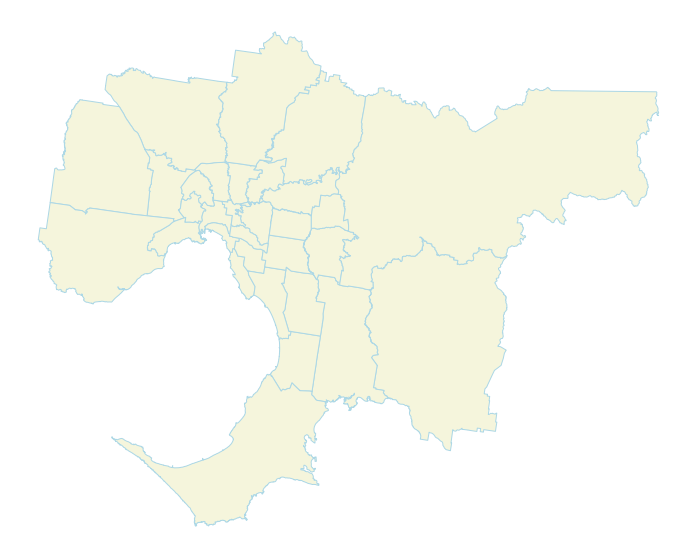

In [138]:
melb_geo_df.plot(figsize = (14,10), column = '2020-08-05', cmap = cmap, scheme = 'userdefined', 
                 classification_kwds={'bins':q20.bins}, edgecolor = 'lightblue')
plt.axis('off')
plt.show()

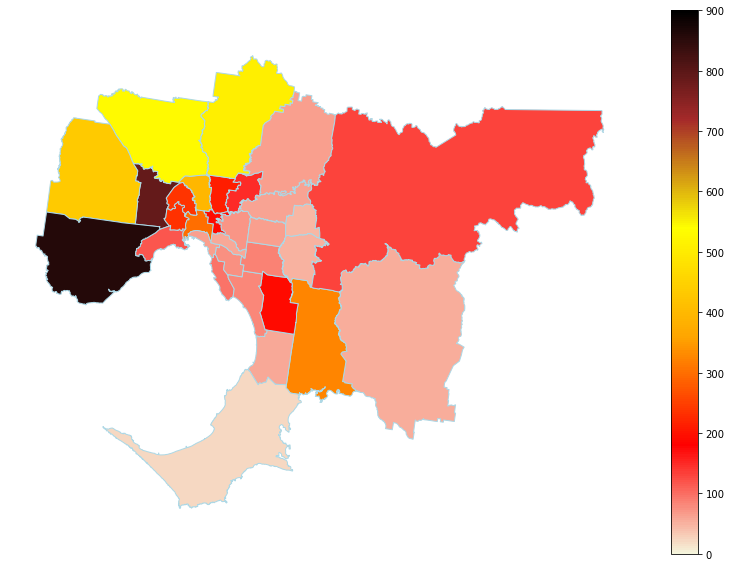

In [137]:
cmap = LinearSegmentedColormap.from_list('ag_custom', ['beige', 'red', 'orange', 'yellow', 'brown', 'black'])

melb_geo_df.plot(figsize = (14,10), column = '2020-08-05', cmap = cmap, k = 100, vmin = 0, vmax = 900, 
                 edgecolor = 'lightblue', legend = True)
plt.axis('off')
plt.show()

In [36]:
import matplotlib.colors
matplotlib.colors.get_named_colors_mapping()

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 'xkcd:yellowish tan': '#fcfc81',
 'xkcd:cement': '#a5a391',
 'xkcd:dark grass green': '#388004',
 'xkcd:dusty teal': '#4c9085',
 'xkcd:grey teal': '#5e9b8a',
 'xkcd:macaroni and cheese': '#efb435',
 'xkcd:pinkish tan': '#d99b82',
 'xkcd:spruce': '#0a5f38',
 'xkcd:strong blue': '#0c06f7',
 'xkcd:toxic green': '#61de2a',
 'xkcd:windows blue': '#3778bf',
 'xkcd:blue blue': '#2242c7',
 'xkcd:blue with a hint of purple': '#533cc6',
 'xkcd:booger': '#9bb53c',
 'xkcd:bright sea green': '#05ffa6',
 'xkcd:dark green blue': '#1f6357',
 'xkcd:deep turquoise': '#017374',
 'xkcd:green teal': '#0cb577',
 'xkcd:strong pink': '#ff0789',
 'xkcd:bland': '#afa88b',
 'xkcd:deep aqua': '#0